# Задание 3[ + 0..5 баллов к 1 или 2] Параметры графа Кронекера

В данном задании генерировал требуемый минимум: 1000 случайных графов scale=12(все что больше просчитывалось на порядок дольше, потому что просчитывалось на Python). Для генерации графов использовал  генератор из исходников graph500, добавив в соответствующем месте вывод ребер как пара вершин в graph.txt.
Итак, имея сгенерированный граф в txt, считал его характеристики используя библиотеку networkx на Python, так как, судя по отзывам, относительно быстрая, способная оперировать графами порядка миллионов вершин(что и требуется) и хорошо <a href="https://networkx.readthedocs.io/en/stable/"> документирована </a>.
Ниже код, получающий на вход граф, обсчитывающий его диаметр, среднее расстояние между вершинами, записывающий итог в [out_all_new.txt](out_all_new.txt),  и параллельно добавляющий степени вершин графа в [all_degrees.txt](all_degrees.txt) для последующего построения гистограммы. Генерировал 1000 графов и подсчет их характеристик скриптом вида [gen_graph.sh](gen_graph.sh) из папки с референс кодом.

In [10]:
import networkx as nx
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter



f = open('graph12.txt', 'r')
f.readline()
g = nx.Graph()

for line in f:
    edge = [int(el) for el in line.split(',')]
    g.add_edge(edge[0],edge[1])
f.close()

graphs = list(nx.connected_component_subgraphs(g))
connected = 'yes' if len(graphs) == 1 else 'no'

count_nodes = 0
all_path = 0
diameter = 0

degree_file = open('all_degrees.txt', 'a')
for graph in graphs:
    p = nx.shortest_path_length(graph)
    graph.node
    nodes = graph.nodes()
    count_nodes += (len(nodes)*len(nodes))
    for v1 in nodes:
        degree_file.write('{}\n'.format(graph.degree(v1)))
        for v2 in nodes:
            diameter = p[v1][v2] if p[v1][v2] > diameter else diameter
            all_path += p[v1][v2]
degree_file.close()
avg_path = all_path / float(count_nodes)

f = open('out_all_new.txt', 'a')
f.write('{} {} {}\n'.format(diameter, avg_path, connected))
f.close()


### Взглянув на итоговый файл с диаметрами  могу сказать, что в абсолютном большинстве случае диаметром являлась 6, реже 5 и очень изредка 7. 
### Среднее расстояние между вершинами колебалось в диапазоне 2,63-2,67. 
### Граф являлся несвязным абсолютно во всех случаях, потому что часто было порядка чуть ли не половины изолированных вершин, поэтому ради интереса в своем коде я их не учитывал и добавлял только те, вершины между которыми есть ребра. Поэтому если в третьей колонке файла yes, то это значит, что там была одна большая компонента свзяности(если забыть об изолированных вершинах), no - встречаются пару ребер, изолированных от основной компоненты свзяности графа.

## Гистограмма  степеней вершин:

(array([  7.70595000e+05,   8.57910000e+04,   1.22213000e+05,
          3.85930000e+04,   1.48000000e+02,   1.48000000e+02,
          1.08600000e+04,   4.30010000e+04,   1.84840000e+04,
          9.81000000e+02,   6.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.60000000e+01,   1.04600000e+03,
          6.35800000e+03,   9.50300000e+03,   4.37700000e+03,
          6.78000000e+02,   2.40000000e+01,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.20000000e+01,   1.02000000e+02,   4.78000000e+02,
          1.11300000e+03,   1.38400000e+03,   7.01000000e+02,
          1.89000000e+02,   2.70000000e+01,   2.00000000e+00,
        

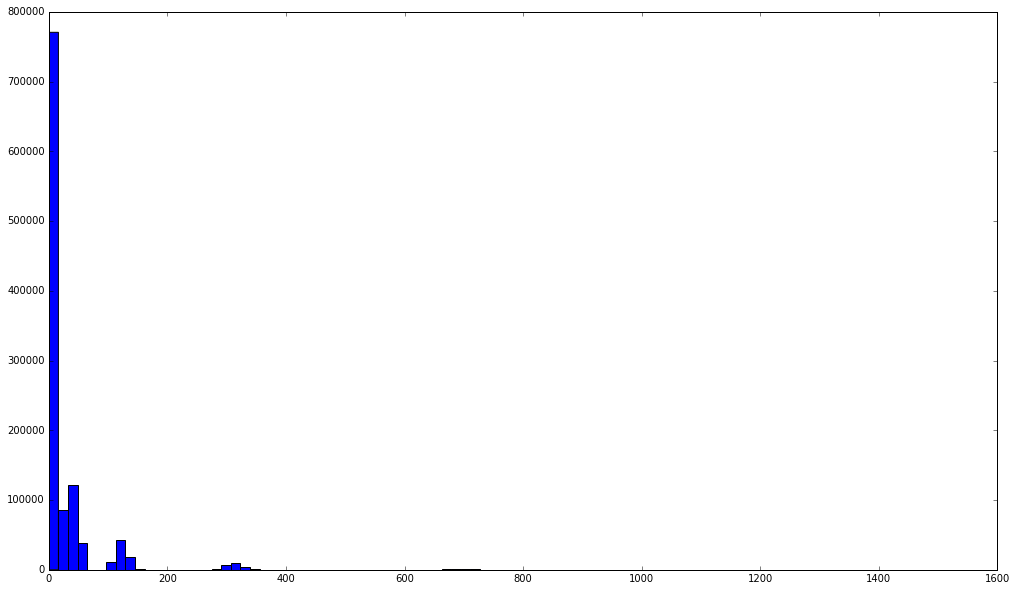

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
f = open('all_degrees.txt', 'r')
degrees = []
for line in f:
    degrees.append(int(line))
f.close()

bins = numpy.linspace(0, 1600, 100)
matplotlib.rcParams['figure.figsize'] = (17.0, 10.0)
plt.hist(degrees,bins)


### Собственно получили то, чего и требовалось ожидать - большинство вершин имело малую степень,чем дальше. Интересны небольшие  "холмы" в районе степеней 300 и 700, я так подозреваю, это что-то вроде центральных вершин компоненты свзяности, так называемых знаменитостей, имеющих много связей.